In [1]:
# load packages and libraries
import pandas as pd
import sqlite3
import datetime
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import sklearn.feature_extraction.text
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import sklearn.dummy
from sklearn.dummy import DummyClassifier
%matplotlib inline
plt.style.use('ggplot')
from matplotlib import style

In [3]:
#loading data from csv file
df=pd.read_csv(r'C:\Users\avanm\OneDrive\Desktop\Big data assignments\Project\amazon-fine-food-reviews\Reviews.csv')

In [4]:
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [16]:
df.fillna('',inplace=True)

Text(0,0.5,'Percentage')

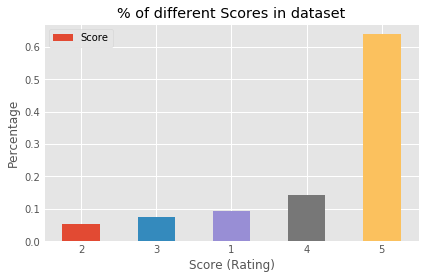

In [5]:
# % of different Score in dataset
ax = df.Score.value_counts(normalize=True).sort_values(ascending=True).plot(
    kind='bar',legend=True,title='% of different Scores in dataset')
ax.xaxis.set_tick_params(rotation=0)
ax.set_xlabel("Score (Rating)")
ax.set_ylabel("Percentage")

Text(0,0.5,'Count')

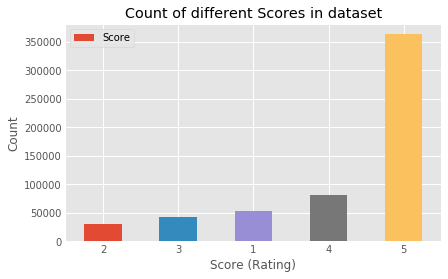

In [6]:
ax = df.Score.value_counts().sort_values(ascending=True).plot(kind='bar',legend=True,title='Count of different Scores in dataset')
ax.xaxis.set_tick_params(rotation=0)
ax.set_xlabel("Score (Rating)")
ax.set_ylabel("Count")

In [7]:
#converting column Time to correct timeformat
df['datetime'] = df['Time'].map(lambda x: (datetime.datetime.fromtimestamp(int(x)).strftime('%Y-%m-%d %H:%M:%S')))
df['datetime'] = pd.to_datetime(df['datetime'])

Text(0,0.5,'No.of Reviews')

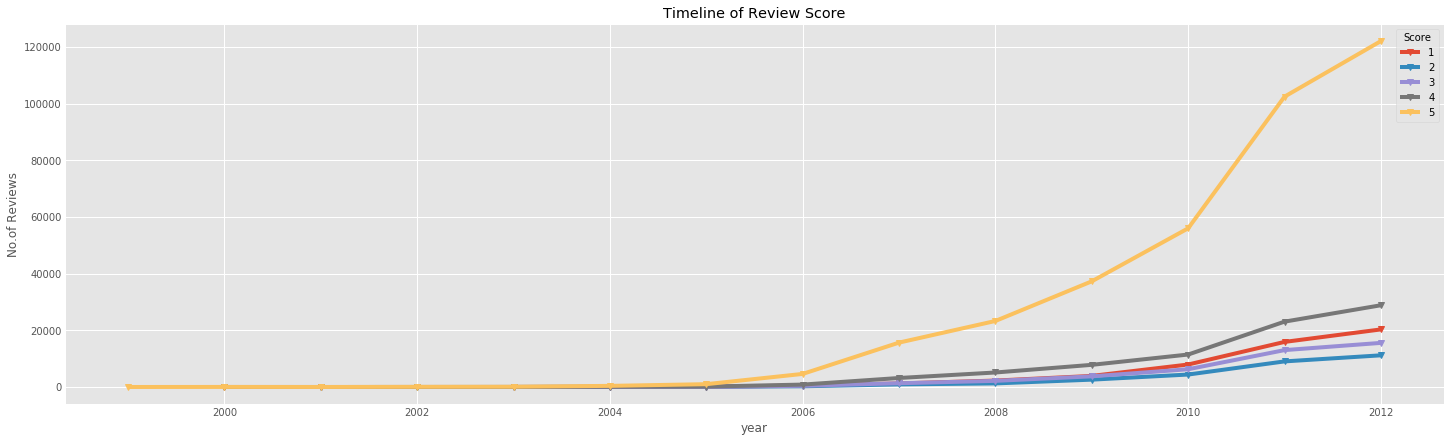

In [8]:
df['year']=df.datetime.dt.year
ax = df.groupby(['year','Score'])['Score'].count().unstack().plot(style='-v',figsize=(
    22,7),title='Timeline of Review Score')
ax.set_ylabel("No.of Reviews")

Text(0.5,0,'No.of Reviews')

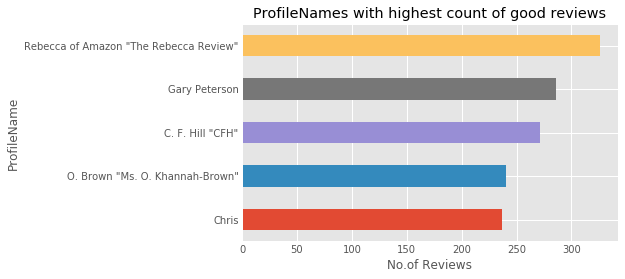

In [9]:
#Profiles which gave most Score 5
ax = df[df.Score==5].groupby('ProfileName')['Score'].count().nlargest(5).sort_values(
    ascending=True).plot(kind='barh',title='ProfileNames with highest count of good reviews')
ax.set_xlabel("No.of Reviews")

Text(0.5,0,'No.of Reviews')

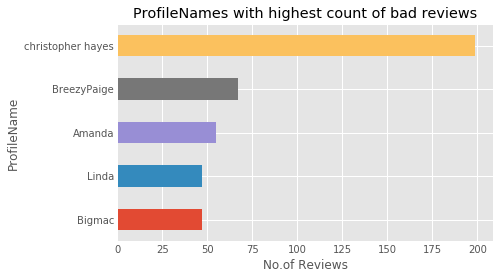

In [10]:
#Profiles which gave most Score 1
ax = df[df.Score==1].groupby('ProfileName')['Score'].count().nlargest(5).sort_values(
    ascending=True).plot(kind='barh',title='ProfileNames with highest count of bad reviews')
ax.set_xlabel("No.of Reviews")

In [11]:
temp_df = df[['UserId','HelpfulnessNumerator','HelpfulnessDenominator', 'Summary', 'Text','Score']].copy()

#Adding new features to dataframe.
temp_df["Sentiment"] = temp_df["Score"].apply(lambda score: "positive" if score >= 3 else \
                                              ("negative" if score < 3 else "not defined"))
temp_df["Usefulness"] = (temp_df["HelpfulnessNumerator"]/temp_df["HelpfulnessDenominator"]).apply\
(lambda n: ">75%" if n > 0.75 else ("<25%" if n < 0.25 else ("25-75%" if n >= 0.25 and\
                                                                        n <= 0.75 else "useless")))

temp_df.loc[temp_df.HelpfulnessDenominator == 0, 'Usefulness'] = ["useless"]

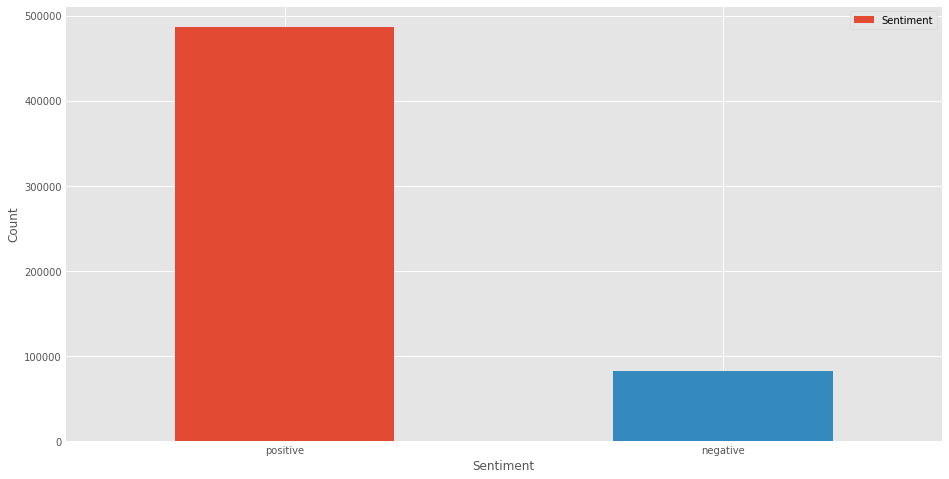

In [12]:
ax = temp_df['Sentiment'].value_counts().plot(kind='bar',legend=True,
                                    figsize=(14,8))
ax.set_xlabel("Sentiment")
ax.set_ylabel("Count")
ax.xaxis.set_tick_params(rotation=0)

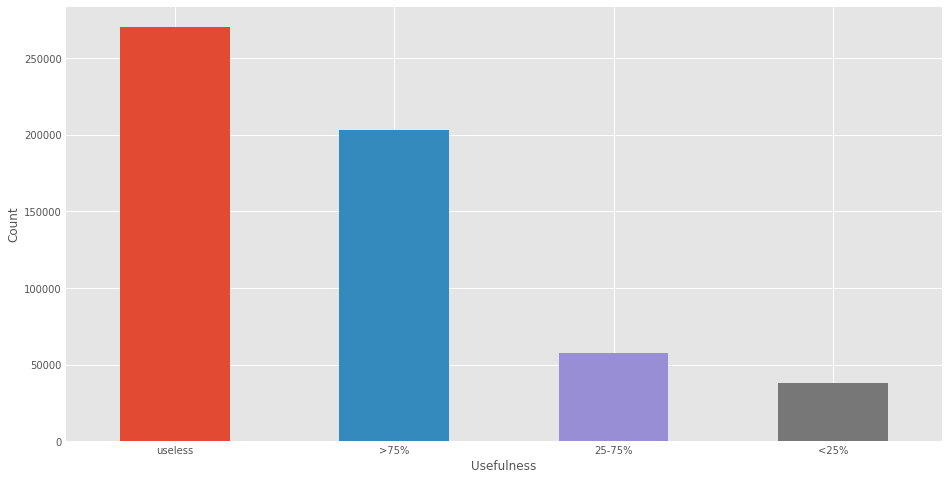

In [13]:
ax = temp_df['Usefulness'].value_counts().plot(kind='bar',
                                    figsize=(14,8))
ax.set_xlabel("Usefulness")
ax.set_ylabel("Count")
ax.xaxis.set_tick_params(rotation=0)